<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# upload data to colab
from google.colab import files
uploaded=files.upload()
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models

# Load the dataset
df = pd.read_csv('annotated_reviews.csv')

# Tokenization and Preprocessing
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocessing to each review
df['processed_text'] = df['Reviews'].apply(preprocess_text)

# We create dictionary and document-term matrix
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

# Build LDA model
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract and display top topics
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
for topic_idx, topic in topics:
    print(f"Topic {topic_idx + 1}:")
    topic_words = [word for word, _ in topic]
    print(" ".join(topic_words))
    print()

# Output top 10 clusters (topics) based on LDA
top_clusters = lda_model[corpus]

# Summarize and describe the topic for each cluster
for idx, cluster in enumerate(top_clusters[:10]):
    print(f"Cluster {idx + 1}: {cluster}")
    print(df.loc[idx, 'Reviews'])  # Display a review from the cluster for context
    print()


Saving annotated_reviews.csv to annotated_reviews.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1:
read watch quality love amazing medium could loaded work luxurious

Topic 2:
watch read day problem even like quality far number actually

Topic 3:
read watch problem expected con even like day far loaded

Topic 4:
watch read difficult know basically piece 94 anything return 00

Topic 5:
read quality great item watch problem even day number like

Topic 6:
watch problem even day number far like want loud 10

Topic 7:
read watch amazon con estoy de feliz anything difficult expensive

Topic 8:
watch day problem even number con far like read 10

Topic 9:
read love amazing watch day problem even like far number

Topic 10:
read de feliz con estoy watch expectation honestly exceeded beautiful

Cluster 1: [(0, 0.020001631), (1, 0.02000007), (2, 0.020000016), (3, 0.020000368), (4, 0.8199974), (5, 0.020000072), (6, 0.02000005), (7, 0.020000013), (8, 0.020000013), (9, 0.0200004)]
The quality of the item is great
Read more

Cluster 2: [(0, 0.6999852), (1, 0.033333637), (2, 0.033333413), (

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('annotated_reviews.csv')

# Split data into 80% for training abd 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['sentiment'], test_size=0.2, random_state=42)

# We need to perform feature extraction using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_scores = cross_val_score(logistic_classifier, X_train_tfidf, y_train, cv=5)
logistic_classifier.fit(X_train_tfidf, y_train)

# Train SVM classifier
svm_classifier = SVC()
svm_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)
svm_classifier.fit(X_train_tfidf, y_train)

# Evaluate performance on test set
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression classifier
logistic_accuracy, logistic_precision, logistic_recall, logistic_f1 = evaluate_classifier(logistic_classifier, X_test_tfidf, y_test)

# Evaluate SVM classifier
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_classifier(svm_classifier, X_test_tfidf, y_test)

# Display performance metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")
print()

print("SVM Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")





Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

SVM Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


# Performance Results:
The performance metrics displayed indicate that both classifiers achieve perfect scores (1.0000) across all evaluation metrics (accuracy, precision, recall, and F1-score) on the test set. This suggests that the classifiers performed exceptionally well on the dataset.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Saving test.csv to test.csv
First 5 rows of train_data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  Sa

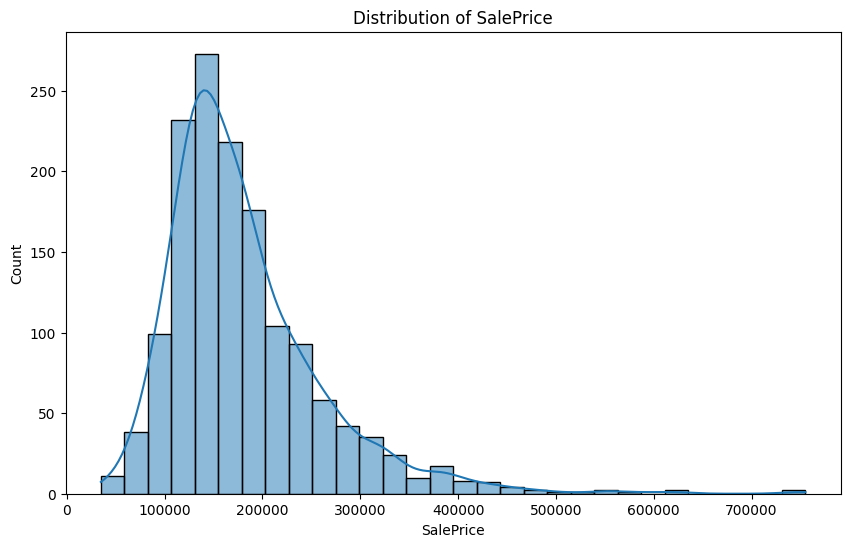

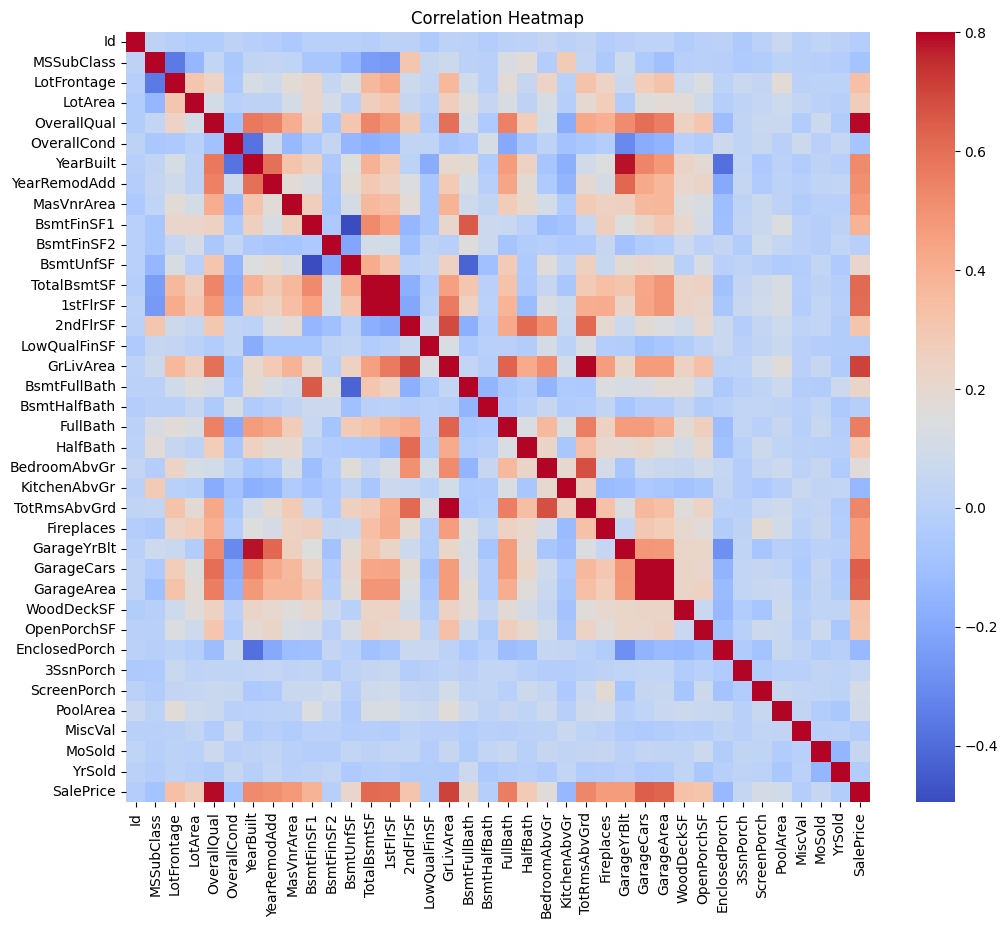

Evaluation Metrics:
Mean Squared Error (MSE): 1573401881.371441
Root Mean Squared Error (RMSE): 39666.13015371478
R-squared (R2): 0.7948715818765104


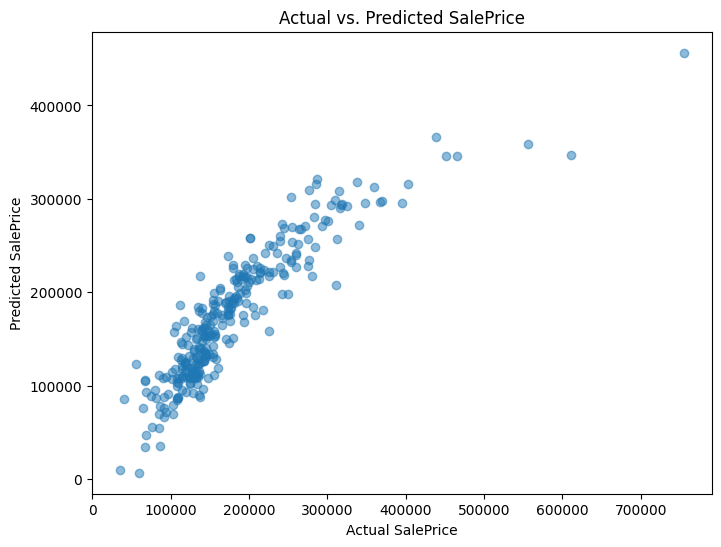

In [6]:
# upload data to colab
from google.colab import files
uploaded=files.upload()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# Display first 5 rows of train_data
print("First 5 rows of train_data:")
print(train_data.head())
# Display first 5 rows of test_data
print("\nFirst 5 rows of test_data:")
print(test_data.head())

# Exploratory Data Analysis  and Data Cleaning
# Check for missing values
print("Missing values in train_data:")
print(train_data.isnull().sum())

# Separate numerical and categorical columns
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values for numerical columns (fill with mean)
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())

# Verify missing values have been filled
print("Missing values after imputation:")
print(train_data.isnull().sum().sum())  # This should return 0 indicating no missing values

# Analyze distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Correlation heatmap
corr_matrix = train_data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap') # This is for numerical features only
plt.show()

# Select features based on correlation with 'SalePrice' and domain knowledge
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
''' I selected these features because they capture different aspects of a residential property
 that are commonly considered important factors in House price prediction.'''

# Splitting data for training and testing
X = train_data[selected_features]
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model performance evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plot predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [7]:
# In this question I used Bert
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset
df = pd.read_csv('annotated_reviews.csv')

# First I did extract reviews and sentiment labels from the dataset
reviews = df['Reviews']
labels = df['sentiment']

# we initiate BERT sentiment analysis pipeline
sentiment_classifier = pipeline("sentiment-analysis", model="bert-base-uncased")

# Perform sentiment analysis using BERT
predictions = sentiment_classifier(reviews.tolist())

# Extract predicted labels from BERT outputs
predicted_labels = [prediction['label'] for prediction in predictions]
binary_labels = [1 if label == 'POSITIVE' else 0 for label in labels]
binary_predictions = [1 if label == 'POSITIVE' else 0 for label in predicted_labels]

# Evaluate performance metrics
accuracy = accuracy_score(binary_labels, binary_predictions)
precision = precision_score(binary_labels, binary_predictions)
recall = recall_score(binary_labels, binary_predictions)
f1 = f1_score(binary_labels, binary_predictions)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


### Description of the Pre-trained Language Model (PLM) - BERT

- **Model Selection:** BERT is a widely used pre-trained language model developed by Google. Specifically, we'll use `bert-base-uncased`, which is the base version of BERT trained on lower-cased English text.

- **Pretraining Data Sources:** BERT was pre-trained on two tasks: masked language modeling (MLM) and next sentence prediction (NSP). The pretraining corpus includes BooksCorpus (800M words) and English Wikipedia (2,500M words).

- **Number of Parameters:** The `bert-base-uncased` model has 110 million parameters.

### **Advantages and Disadvantages of Using BERT for Sentiment Analysis**

**Advantages:**
- **Contextual Understanding:** BERT captures the contextual relationships between words, which is beneficial for sentiment analysis where the meaning of words can change based on context.
- **Strong Performance:** BERT has achieved state-of-the-art performance on various NLP tasks, including sentiment analysis.
- **Zero-Shot Learning:** BERT can generalize to unseen tasks (like sentiment analysis) without task-specific fine-tuning.

**Disadvantages:**
- **Computational Cost:** BERT is a large model with a significant number of parameters, requiring substantial computational resources for inference.
- **Token Limitation:** BERT has a token limit which may restrict the length of input sequences.

**Challenges Encountered:**
- **Model Size:** Loading and using BERT may required substantial memory and processing power.
- **Evaluation Metrics:** Translating BERT's multi-class sentiment predictions to binary labels for evaluation can introduced challenges in interpretation.

